<a href="https://colab.research.google.com/github/MHosseinHashemi/Skin_Cancer/blob/main/Base_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [ ]:
!pip install kaggle

In [ ]:
import os
import cv2
import shutil
import random
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image
from tqdm import tqdm
from google.colab import files
from sklearn.utils import shuffle
from warnings import filterwarnings
from sklearn.model_selection import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import load_model
from IPython.display import display,clear_output
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications.resnet import ResNet50

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohammadhossein77","key":"4b45066c4c15347998fff7a6f7564d95"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d amirmohammadparvizi/melanoma

Dataset URL: https://www.kaggle.com/datasets/amirmohammadparvizi/melanoma
License(s): MIT
100% 877M/879M [00:42<00:00, 18.5MB/s]
100% 879M/879M [00:42<00:00, 21.9MB/s]


In [ ]:
zip_ref = zipfile.ZipFile('/content/melanoma.zip', 'r')

In [ ]:
zip_ref.extractall('/content/SkinCancerDataset')

In [ ]:
zip_ref.close()

In [ ]:
benigns = len(os.listdir("/content/SkinCancerDataset/Melanoma - b2336m584/Melanoma - b2336m584/benign"))
melignant = len(os.listdir("/content/SkinCancerDataset/Melanoma - b2336m584/Melanoma - b2336m584/malignant"))
print(f"Number of benign Samples: {benigns}\nNumber of malignant Samples: {melignant}")

Number of benign Samples: 2336
Number of malignant Samples: 584




> Removing random samples from the majority class



In [ ]:
from random import sample

min_path = "/content/SkinCancerDataset/Melanoma - b2336m584/Melanoma - b2336m584/malignant"
maj_path = "/content/SkinCancerDataset/Melanoma - b2336m584/Melanoma - b2336m584/benign"
address = []
for image in os.listdir(maj_path):
  address.append(image)

cut = len(os.listdir(min_path))
print(cut)
cut_list = sample(address, cut)
for index in tqdm(os.listdir(maj_path)):
  if index in cut_list:
    pass
  else:
    os.remove(os.path.join(maj_path, index))


# Verification
benigns = len(os.listdir("/content/SkinCancerDataset/Melanoma - b2336m584/Melanoma - b2336m584/benign"))
melignant = len(os.listdir("/content/SkinCancerDataset/Melanoma - b2336m584/Melanoma - b2336m584/malignant"))
print(f"\nNumber of benign Samples: {benigns}\nNumber of malignant Samples: {melignant}")


584


100%|██████████| 2336/2336 [00:00<00:00, 10511.39it/s]


Number of benign Samples: 584
Number of malignant Samples: 584


In [ ]:
def divide_test_set(temp_path, cut_precentage):
  """
  temp_path:
                Must be a path to the directory you want to take samples from

  cut_precentage:
                  Must be a float value between 0 and 1 indicating how much data you want to specify as a test set
                  """
  rel_image_paths = []
  for i in os.listdir(temp_path):
    rel_image_paths.append(os.path.join(temp_path, i))
  cut_set = random.sample(rel_image_paths, int(cut_precentage * len(os.listdir(temp_path))))
  print(f"Picked {int(cut_precentage * len(os.listdir(temp_path)))} samples from total {len(os.listdir(temp_path))} samples")

  return cut_set




> Remmeber to Rename folders to "data/train" before running the next cells


In [ ]:
input_path = "/content/SkinCancerDataset/data/train/benign"
benign_test_set = divide_test_set(input_path, 0.20)

Picked 116 samples from total 584 samples


In [ ]:
input_path = "/content/SkinCancerDataset/data/train/malignant"
malignant_test_set = divide_test_set(input_path, 0.20)

Picked 116 samples from total 584 samples


In [ ]:
# Now lets move test samples to another directory
benign_test_path = "/content/SkinCancerDataset/data/test/benign"
os.makedirs(benign_test_path, exist_ok=True)
for index in tqdm(benign_test_set):
  shutil.move(index, benign_test_path)

print(len(benign_test_path))

100%|██████████| 116/116 [00:00<00:00, 11468.49it/s]

43


In [ ]:
malignant_test_path = "/content/SkinCancerDataset/data/test/malignant"
os.makedirs(malignant_test_path, exist_ok=True)
for index in tqdm(malignant_test_set):
  shutil.move(index, malignant_test_path)

print(len(malignant_test_path))

100%|██████████| 116/116 [00:00<00:00, 9792.08it/s]

46




> A bit of EDA out of curiosity (Dont run them)



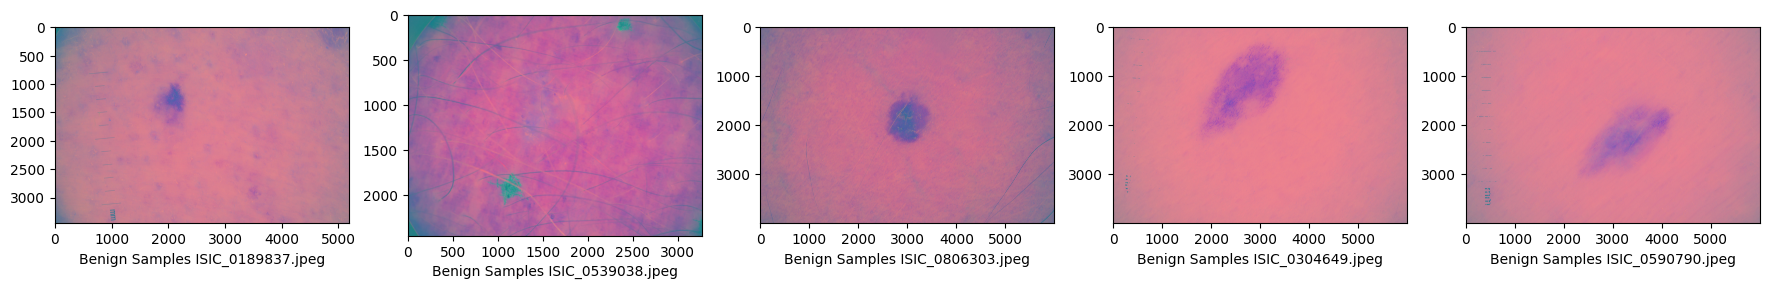

In [ ]:
# root = "/content/SkinCancerDataset/Melanoma - b2336m584/Melanoma - b2336m584/benign"

# fig, ax = plt.subplots(1,5, figsize=(22,8))
# for i , index in enumerate(os.listdir(root)):
#   if i<5:
#     temp_path = os.path.join(root, index)
#     img = Image.open(temp_path)
#     ax[i].imshow(img)
#     ax[i].set_xlabel(f"Benign Samples {index}", fontsize=10, color='black')

#   else:
#     break

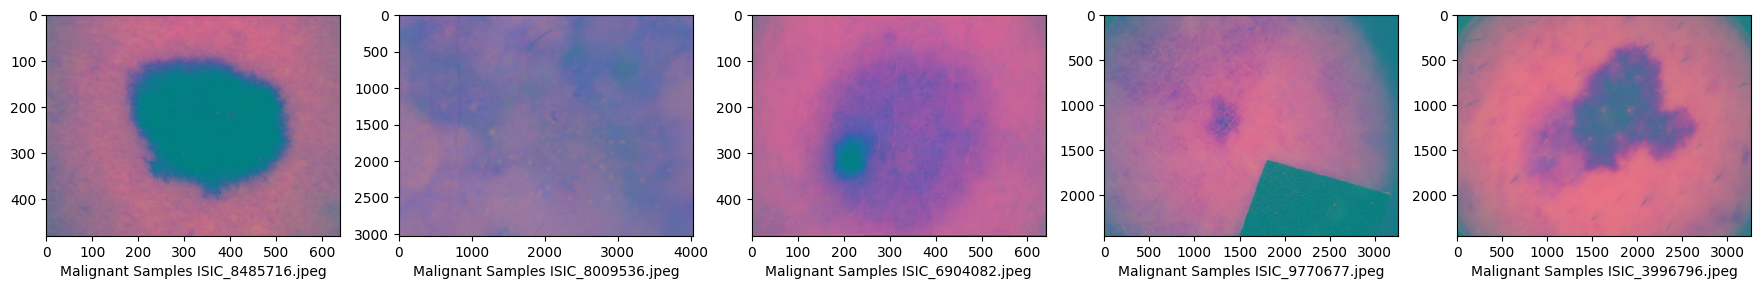

In [ ]:
# root = "/content/SkinCancerDataset/Melanoma - b2336m584/Melanoma - b2336m584/malignant"

# fig, ax = plt.subplots(1,5, figsize=(22,8))
# for i , index in enumerate(os.listdir(root)):
#   if i<5:
#     temp_path = os.path.join(root, index)
#     img = Image.open(temp_path)
#     ax[i].imshow(img)
#     ax[i].set_xlabel(f"Malignant Samples {index}", fontsize=10, color='black')

#   else:
#     break

In [ ]:
# !zip -r /content/SkinCancerDataset.zip /content/SkinCancerDataset

  adding: content/SkinCancerDataset/ (stored 0%)
  adding: content/SkinCancerDataset/Melanoma - b2336m584/ (stored 0%)
  adding: content/SkinCancerDataset/Melanoma - b2336m584/Melanoma - b2336m584/ (stored 0%)
  adding: content/SkinCancerDataset/Melanoma - b2336m584/Melanoma - b2336m584/malignant/ (stored 0%)
  adding: content/SkinCancerDataset/Melanoma - b2336m584/Melanoma - b2336m584/malignant/ISIC_8677053.jpeg (deflated 19%)
  adding: content/SkinCancerDataset/Melanoma - b2336m584/Melanoma - b2336m584/malignant/ISIC_3464344.jpeg (deflated 8%)
  adding: content/SkinCancerDataset/Melanoma - b2336m584/Melanoma - b2336m584/malignant/ISIC_3696488.jpeg (deflated 9%)
  adding: content/SkinCancerDataset/Melanoma - b2336m584/Melanoma - b2336m584/malignant/ISIC_6961503.jpeg (deflated 16%)
  adding: content/SkinCancerDataset/Melanoma - b2336m584/Melanoma - b2336m584/malignant/ISIC_6285925.jpeg (deflated 24%)
  adding: content/SkinCancerDataset/Melanoma - b2336m584/Melanoma - b2336m584/malignan

In [ ]:
# lets move it to the Drive ...
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# shutil.copy("/content/SkinCancerDataset.zip", "/content/drive/MyDrive")

'/content/drive/MyDrive/SkinCancerDataset.zip'



> Load and shuffle the data



In [ ]:
batch_size = 4

In [ ]:
def train_generator(TRAINING_DIR):

    train_datagen = ImageDataGenerator(rescale=1/255)
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                        batch_size=batch_size,
                                                        class_mode='binary',
                                                        target_size=(224, 224))

    return train_generator

In [ ]:
def val_generator(VAL_DIR):

    test_datagen = ImageDataGenerator(rescale=1/255)
    test_generator = test_datagen.flow_from_directory(directory=VAL_DIR,
                                                      batch_size=batch_size,
                                                      class_mode='binary',
                                                      target_size=(224,224))

    return test_generator

In [ ]:
def shuffle_and_split_data(src_dir, dest_dir, split_percent):

    image_filenames = os.listdir(src_dir)
    num_images = len(image_filenames)

    # Shuffle the image filenames and move them into the destination with respect to the split percent
    random.shuffle(image_filenames)
    num_images_to_move = int(num_images * split_percent)

    for i in tqdm(range(num_images_to_move)):
        image_filename = image_filenames[i]
        src_path = os.path.join(src_dir, image_filename)
        dest_path = os.path.join(dest_dir, image_filename)
        shutil.move(src_path, dest_path)


In [ ]:
# Paths to the source and destination directories
train_benign_dir = "/content/SkinCancerDataset/data/train/benign"
train_malignant_dir = "/content/SkinCancerDataset/data/train/malignant"
validation_dir = "/content/SkinCancerDataset/data/validation"
os.makedirs(validation_dir, exist_ok=True)

In [ ]:
# Create the benign and malignant directories inside the validation directory
validation_benign_dir = os.path.join(validation_dir, "benign")
validation_malignant_dir = os.path.join(validation_dir, "malignant")
os.makedirs(validation_benign_dir, exist_ok=True)
os.makedirs(validation_malignant_dir, exist_ok=True)

In [ ]:
split_percent = 0.20
shuffle_and_split_data(train_benign_dir, validation_benign_dir, split_percent)
shuffle_and_split_data(train_malignant_dir, validation_malignant_dir, split_percent)

print("\nData shuffling and splitting completed.")

100%|██████████| 93/93 [00:00<00:00, 19965.72it/s]


Data shuffling and splitting completed.


In [ ]:
# Verification
va = len(os.listdir("/content/SkinCancerDataset/data/validation/benign"))
tr = len(os.listdir("/content/SkinCancerDataset/data/train/benign"))
print(f"\nNumber of benign train Samples: {tr}\nNumber of benign validation Samples: {va}")


Number of benign train Samples: 375
Number of benign validation Samples: 93


In [ ]:
# Verification
va_ = len(os.listdir("/content/SkinCancerDataset/data/validation/malignant"))
tr_ = len(os.listdir("/content/SkinCancerDataset/data/train/malignant"))
print(f"\nNumber of malignant train Samples: {tr_}\nNumber of malignant validation Samples: {va_}")


Number of malignant train Samples: 375
Number of malignant validation Samples: 93


In [ ]:
# (it should be ~934)
va+va_+tr_+tr

936

In [ ]:
Train_Dir = '/content/SkinCancerDataset/data/train'
train_generator = train_generator(TRAINING_DIR=Train_Dir)

Found 750 images belonging to 2 classes.


In [ ]:
Val_Dir = '/content/SkinCancerDataset/data/validation'
validation_generator = val_generator(VAL_DIR=Val_Dir)

Found 186 images belonging to 2 classes.




> For Future ...



In [ ]:
train_generator.class_indices

{'benign': 0, 'malignant': 1}

# Pilot Modeling

In [ ]:
image_size = 224
ResNet50 = ResNet50(weights="imagenet", include_top=False, input_shape=(image_size, image_size, 3))
model = ResNet50.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.25)(model)
model = tf.keras.layers.Dense(1,activation='sigmoid')(model)
model = tf.keras.models.Model(inputs=ResNet50.input, outputs = model)

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
# For the Debugging Approach

# image_size = 224
# ResNet50 = ResNet50(weights="imagenet", include_top=False, input_shape=(image_size, image_size, 3))

# model = ResNet50.output
# model = tf.keras.layers.Flatten()(model)
# model = tf.keras.layers.Dense(512, activation='relu')(model)
# model = tf.keras.layers.Dropout(0.25)(model)
# model = tf.keras.layers.Dense(256, activation='relu')(model)
# model = tf.keras.layers.Dropout(0.25)(model)
# model = tf.keras.layers.Dense(1, activation='sigmoid')(model)
# model = tf.keras.models.Model(inputs=ResNet50.input, outputs = model)

In [ ]:
# f1 = 2*(tf.compat.v1.metrics.recall(labels, predictions) * tf.compat.v1.metrics.precision(labels, predictions)) / ( tf.compat.v1.metrics.recall(labels, predictions) + tf.compat.v1.metrics.precision(labels, predictions))
# def f1_score(labels, predictions):
  # recall_score = tf.compat.v1.metrics.recall(labels, predictions)
  # precision_score = tf.compat.v1.metrics.precision(labels, predictions)
  # fscore = 2*(recall_score * precision_score) / (recall_score + precision_score)
  # return fscore


In [ ]:
opt = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer = opt, metrics= ['accuracy','Recall','Precision'])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.5,
                              patience = 5,
                              min_delta = 0.001,
                              mode='auto',
                              verbose=1)

In [ ]:
EPOCHS = 60

history = model.fit(
        train_generator,
        steps_per_epoch= (tr+tr_)//batch_size,
        epochs=EPOCHS,
        verbose=1,
        validation_data = validation_generator,
        callbacks=[reduce_lr]
        )

Epoch 1/60
187/187 [==============================] - 97s 307ms/step - loss: 0.9024 - accuracy: 0.5938 - recall: 0.5550 - precision: 0.6017 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000 - lr: 0.0010
Epoch 2/60
187/187 [==============================] - 53s 284ms/step - loss: 0.6888 - accuracy: 0.6421 - recall: 0.5818 - precision: 0.6616 - val_loss: 0.6933 - val_accuracy: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000 - lr: 0.0010
Epoch 3/60
187/187 [==============================] - 52s 278ms/step - loss: 0.7051 - accuracy: 0.6300 - recall: 0.7005 - precision: 0.6150 - val_loss: 0.7868 - val_accuracy: 0.5000 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - lr: 0.0010
Epoch 4/60
187/187 [==============================] - 56s 297ms/step - loss: 0.6993 - accuracy: 0.6019 - recall: 0.7285 - precision: 0.5803 - val_loss: 0.6935 - val_accuracy: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000 - lr: 0.0010
Epoch 5/60
187/187 [============

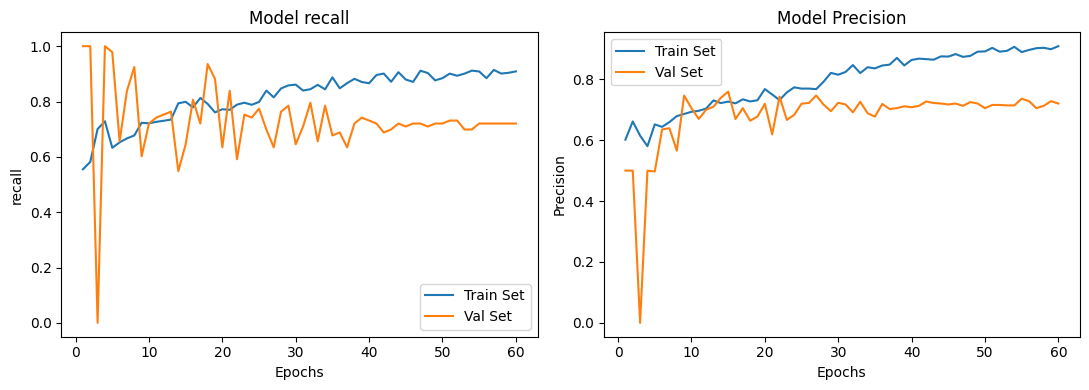

In [ ]:
# plot model performance
acc = history.history['recall']
val_acc = history.history['val_recall']
loss = history.history['precision']
val_loss = history.history['val_precision']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('recall')
plt.title('Model recall')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Model Precision')

plt.tight_layout()
plt.show()

> ### How many of actual positives where detected?

Sensitivity (Recall) = TP/TP+FN

---

> ### How many of total positive predictions are actually positive?

Precision = TP/TP+FP

---

> ### How many of total negative predictions are actually negative?

Specifcity = TN/TN+FP (How many of actual positives where detected)




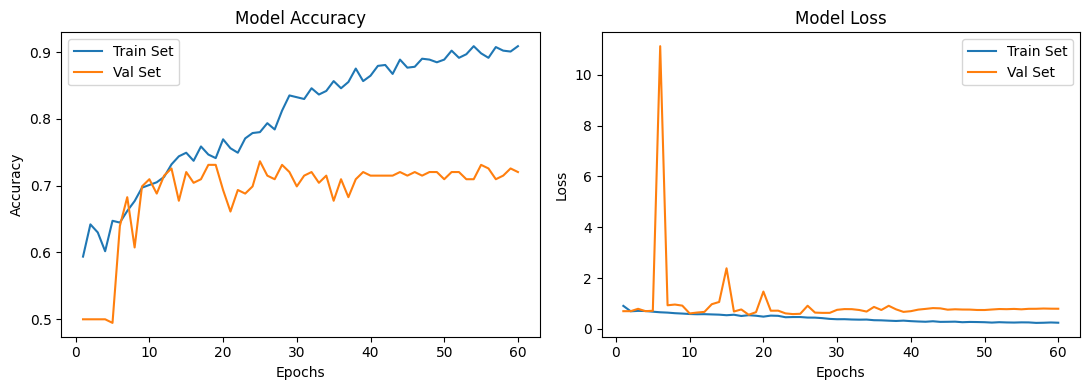

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [ ]:
model.save("/content/resNet50_V3.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Move the weights to Drive for possible future Debug

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
shutil.copy("/content/resNet50_V3.h5", "/content/drive/MyDrive")

'/content/drive/MyDrive/resNet50_V3.h5'

# Testing

In [ ]:
def test_generator(path):

    train_datagen = ImageDataGenerator(rescale=1/255)
    train_generator = train_datagen.flow_from_directory(directory=path,
                                                        batch_size=1,
                                                        class_mode='binary',
                                                        target_size=(224, 224))

    return train_generator

In [ ]:
test_path = "/content/SkinCancerDataset/data/test"
test_generator = test_generator(test_path)

Found 232 images belonging to 2 classes.


In [ ]:
model.evaluate(test_generator)

232/232 [==============================] - 16s 65ms/step - loss: 0.6365 - accuracy: 0.7457 - recall: 0.7155 - precision: 0.7615


[0.6365342140197754,
 0.7456896305084229,
 0.7155172228813171,
 0.7614678740501404]



> ### Test Report

Precision = 0.76

Recall = 0.71

Accuracy = 0.74



#### These lines are just for experimenting ...

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = load_model("/content/drive/MyDrive/resNet50_V3.h5")

In [ ]:
from PIL import Image

root = "/content/SkinCancerDataset/data/test"
predictions = []
labels = []

for label in tqdm(os.listdir(root)):
  if label == "malignant":
    new_root = os.path.join(root, label)
    for image in tqdm(os.listdir(new_root)):
      # read, covert, and normalize the image
      img_path = os.path.join(new_root, image)
      image_file = Image.open(img_path).convert('RGB')
      image_array = np.array(image_file)
      # image_array = image_array * 255.0/image_array.max()
      image_array = cv2.resize(image_array, (224,224))
      image_array = image_array / 255.0
      image_array = image_array.reshape(1, 224,224, 3)
      # Prediction
      predictions.append(model.predict(image_array, verbose=0).squeeze())
      labels.append(1)


  elif label == "benign":
    new_root = os.path.join(root, label)
    for image in tqdm(os.listdir(new_root)):
      # read, covert, and normalize the image
      img_path = os.path.join(new_root, image)
      image_file = Image.open(img_path).convert('RGB')
      image_array = np.array(image_file)
      # image_array = image_array * 255.0/image_array.max()
      image_array = cv2.resize(image_array, (224,224))
      image_array = image_array / 255.0
      image_array = image_array.reshape(1, 224,224, 3)
      # Prediction
      predictions.append(model.predict(image_array, verbose=0).squeeze())
      labels.append(0)

  else:
    print("\nSomething is not right!")




100%|██████████| 2/2 [01:30<00:00, 45.46s/it]


In [ ]:
new_list = [0 if value <= 0.50 else 1 for value in predictions]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

confusion_matrix(labels, new_list)

array([[86, 30],
       [18, 98]])

<Axes: >

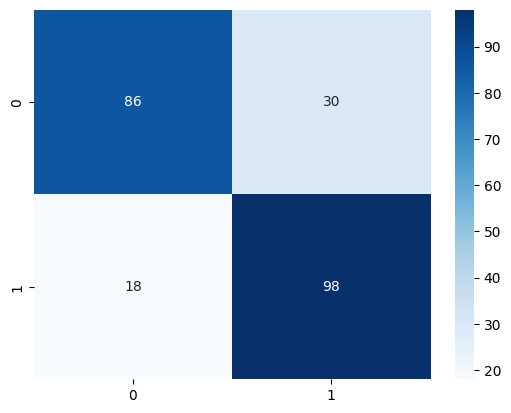

In [ ]:
sns.heatmap(confusion_matrix(labels, new_list), annot=True, cmap="Blues")



# TODO

*   SMOTE
*   Data Augmentation
*   More Complex Models



